In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
!pip install opencv-python-headless

     |████████████████████████████████| 48.3 MB 47 kB/s 


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [3]:
fp = np.fromfile('t1_icbm_normal_1mm_pn3_rf20.rawb', dtype='uint8')

Converting The rawb volume into pgm slices

In [4]:
import struct

# Set the dimensions of the volume
width = 181
height = 217
depth = 181

# Open the input file in binary mode
with open("t1_icbm_normal_1mm_pn3_rf20.rawb", "rb") as file:
    # Loop through each slice in the volume
    for z in range(depth):
        # Create a new PGM file for the slice
        with open(f"outputfiles/pgm/slice_{z}.pgm", "w") as pgm_file:
            # Write the PGM file header
            pgm_file.write("P2\n")
            pgm_file.write("#\n")
            pgm_file.write(f"{width} {height}\n")
            pgm_file.write("255\n")

            # Loop through each row in the slice
            for y in range(height):
                # Read a row of data from the input file
                row_data = file.read(width)  # Each value is 1 byte
                # Unpack the row data into a list of integers
                values = struct.unpack(f"{width}B", row_data)
                # Find the maximum value in the input data
                max_value = max(values)
                # Scale the values down to the maximum range of 255
                scaled_values = [int(v * 255 / max_value) for v in values]

                # Convert each value to decimal and write it to the PGM file
                pgm_file.write(" ".join([str(v) for v in values]) + "\n")


Display Pgm File 

In [5]:
# Open the PGM file
with open('outputfiles/pgm/slice_78.pgm', 'r') as f:
    # Read the contents of the file
    contents = f.read()

# Split the contents into a list of lines
lines = contents.split('\n')

# Iterate through the lines and print each line
for line in lines:
    print(line)


103 99 100 96 92 87 99 108 127 140 140 141 135 131 135 131 138 135 126 108 110 99 95 92 88 91 92 98 97 108 96 61 45 58 74 72 72 75 68 67 67 67 69 88 99 103 133 139 131 128 133 138 138 132 126 131 130 120 121 116 119 102 103 97 77 78 105 101 129 125 116 104 98 98 103 106 111 109 102 87 57 36 21 10 11 8 17 21 37 79 94 95 92 104 123 141 175 125 84 48 39 22 7 2 8 5 2 6 1 9 4 3 5 4 4 2 5 6 4 6 6
10 7 6 8 5 5 10 9 4 6 5 6 3 7 7 5 6 3 5 5 1 3 6 10 27 49 80 121 130 140 124 84 71 85 72 31 10 13 22 13 24 42 62 81 90 101 90 109 113 113 128 141 130 134 130 139 135 113 103 100 102 100 95 87 82 93 100 113 127 139 129 135 142 133 139 133 130 133 134 128 124 109 103 94 99 91 99 92 94 96 73 54 41 55 56 67 65 66 60 65 64 67 66 88 100 116 136 131 134 132 130 132 125 129 128 126 123 119 116 114 113 110 102 98 70 65 97 96 119 129 124 104 105 103 98 100 106 103 95 93 47 24 18 5 22 17 16 30 77 87 95 88 96 132 184 171 135 98 66 42 25 7 5 3 1 8 5 6 9 4 1 2 4 8 3 4 5 4 4 8 7
4 4 7 1 2 1 8 2 6 2 5 11 7 10 3 2 6 

Displaying the PGM image

65


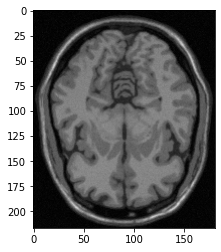

In [9]:
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np
idx = random.randint(0, 181)
print(idx)
path = f"outputfiles/pgm/slice_{idx}.pgm"
image = cv2.imread(path)

# Display the image using imshow
plt.imshow(image)

In [10]:
!pip install pillow

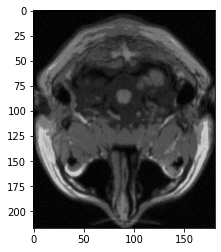

In [7]:
from PIL import Image

path = 'outputfiles/pgm/slice_10.pgm'
image = cv2.imread(path)
plt.imshow(image)

# image = ()

In [8]:
from PIL import Image

path=r'outputfiles/pgm/slice_10.pgm'
# Open the PGM file
with Image.open(path) as im:
    # Convert the PGM file to a JPEG file
    im.save('outputfiles/jpg/slice_10.pgm', 'JPEG')

pgm to jpg

In [13]:
import os
from PIL import Image

# Set the input and output directories
input_dir = "outputfiles/pgm"
output_dir = "outputfiles/jpg"

# Loop through all of the PGM files in the input directory
for file in os.listdir(input_dir):
    if file.endswith(".pgm"):
        # Open the PGM file
        with Image.open(os.path.join(input_dir, file)) as img:
            # Convert the PGM file to a JPEG file
            img.save(os.path.join(output_dir, os.path.splitext(file)[0] + ".jpg"), "JPEG")


In [15]:
pip install scikit-image

     |████████████████████████████████| 14.0 MB 8.7 MB/s 
     |████████████████████████████████| 3.4 MB 383 kB/s 
     |████████████████████████████████| 210 kB 22.4 MB/s 
     |████████████████████████████████| 2.0 MB 7.4 MB/s 
     |████████████████████████████████| 6.9 MB 144 kB/s 
Note: you may need to restart the kernel to use updated packages.


In [11]:
from skimage.morphology import grey
import cv2
import os

input_dir = 'outputfiles/jpg/'
i = 0
for file in os.listdir(input_dir):
    path = f"outputfiles/jpg/slice_{i}.jpg"
    # print(path)
    image = cv2.imread(path)
    # Load the image and convert it to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)        

    # Create a binary mask by thresholding the grayscale image
    ret, mask = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)

    # Perform erosion and dilation to remove small objects and smooth out the mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask = cv2.erode(mask, kernel, iterations=3)
    mask = cv2.dilate(mask, kernel, iterations=3)

    # Use the mask to remove non-brain tissue from the image
    result = cv2.bitwise_and(image, image, mask=mask)

    # Save the result
    cv2.imwrite(f"Skullstriped/stripped_image_{i}.jpg", result)
    i = i+1
        


error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
# Displaying the skull stripped image

97


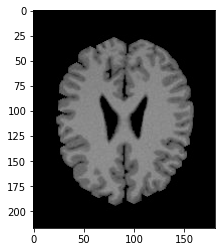

In [21]:
import random
idx = random.randint(0,181)
print(idx)
image = cv2.imread(f'Skullstriped/stripped_image_{idx}.jpg')
plt.imshow(image)